# Getting started with plotting PSP data using pyspedas.

First, we install pyspedas using instructions from this link: https://github.com/spedas/pyspedas

Follow all steps under the Installation Section.


In [44]:
import pyspedas
from pytplot import tplot, store_data, get_data ,tlimit,xlim,ylim

ImportError: cannot import name 'div_data' from 'pytplot' (/Users/jlverniero/pyspedas/lib/python3.8/site-packages/pytplot/__init__.py)

In [6]:
#specify time range in the form ['yyyy-mm-dd/hh:mm:ss','yyyy-mm-dd/hh:mm:ss']
trange=['2020-01-29','2020-01-30']

#specify data type to plot
datatype='spi_sf00_l3_mom' #protons
spi_vars = pyspedas.psp.spi(trange=trange, datatype=datatype, level='l3', time_clip=True)


21-Jul-22 20:54:49: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spi/l3/spi_sf00_l3_mom/2020/
21-Jul-22 20:54:49: File is current: psp_data/sweap/spi/l3/spi_sf00_l3_mom/2020/psp_swp_spi_sf00_l3_mom_20200129_v04.cdf


Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.
Time clip returns full data set.


In [7]:
#print variable names
print(spi_vars)

['QUALITY_FLAG', 'DENS', 'VEL_INST', 'VEL_SC', 'VEL_RTN_SUN', 'T_TENSOR_INST', 'TEMP', 'EFLUX_VS_ENERGY', 'EFLUX_VS_THETA', 'EFLUX_VS_PHI', 'SUN_DIST', 'VENUS_DIST', 'SC_VEL_RTN_SUN', 'QUAT_SC_TO_RTN', 'MAGF_SC', 'MAGF_INST']


The following is a description of each variable:<br>
QUALITY FLAG - Data quality indicator <br>
DENS - Density (1/cm^3) <br>
VEL_INST - Velocity in SPAN-I instrument coordinates (km/s) <br>
VEL_SC - Spacecraft Velocity (km/s)<br>
VEL_RTN_SUN - Ion Velocity in RTN coordinates (km/s)<br>
TEMP - Ion Temperature (eV)<br>
T_TENSOR_INST - Temperature Tensor SPAN-I instrument coordinates <br>
EFLUX_VS_ENERGY - Proton Differential Energy Flux vs eV <br>
EFLUX_VS_THETA - Proton Differential Energy Flux vs Theta (deflectors) <br>
EFLUX_VS_PHI - Proton Differential Energy Flux vs Phi (anodes) <br>
SUN-DIST - Distance from Sun (km)<br>
VENUS-DIST - Distance from Venus (km)<br>
SC_VEL_RTN- Spacecraft Velocity in RTN coordinates (km/s)<br>
QUAT_SC_TO_RTN - Quaternion rotation of spacecraft in RTN coordinates<br>
MAGF_SC - Magnetic field downsampled to SPAN_I time resolution in spacecraft coordinates (nT)<br>
MAGF_INST - Magnetic field downsampled to SPAN_I time resolution in SPAN-I instrument coordinates (nT)<br>

In [19]:
#Indexing in Python starts at 0

#first variable name in list
print(spi_vars[0])

#fist 4 variable names in list
print(spi_vars[0:3])

QUALITY_FLAG
['QUALITY_FLAG', 'DENS', 'VEL_INST']


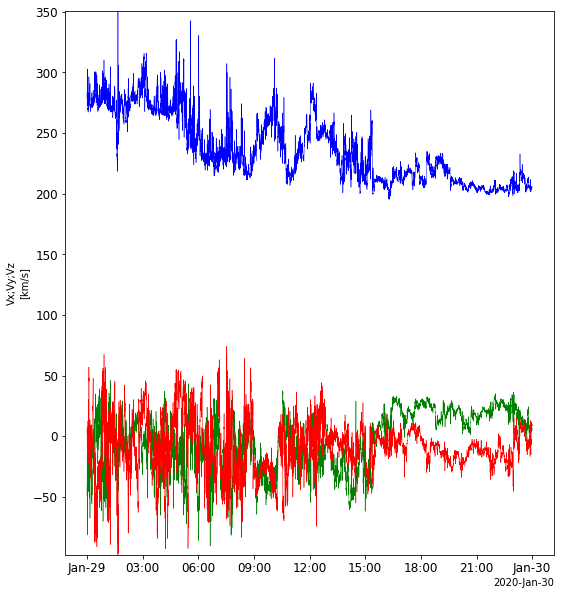

In [23]:
#plot variable vs time
tplot('VEL_RTN_SUN')

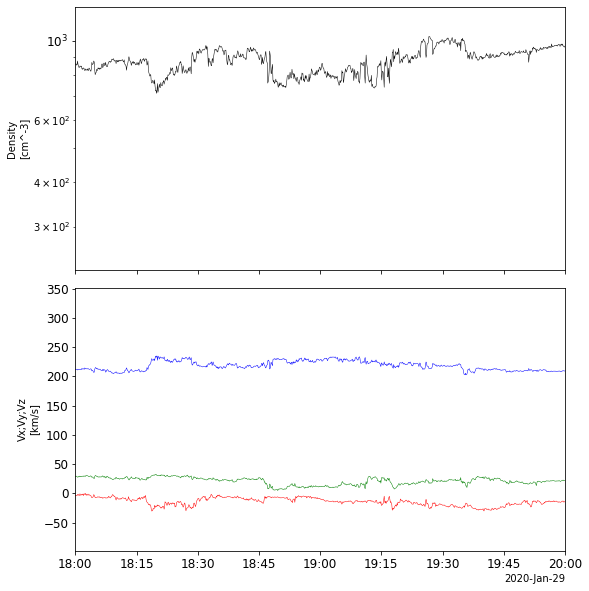

In [36]:
#example plotting multple variables
tplot(['DENS','VEL_RTN_SUN'])

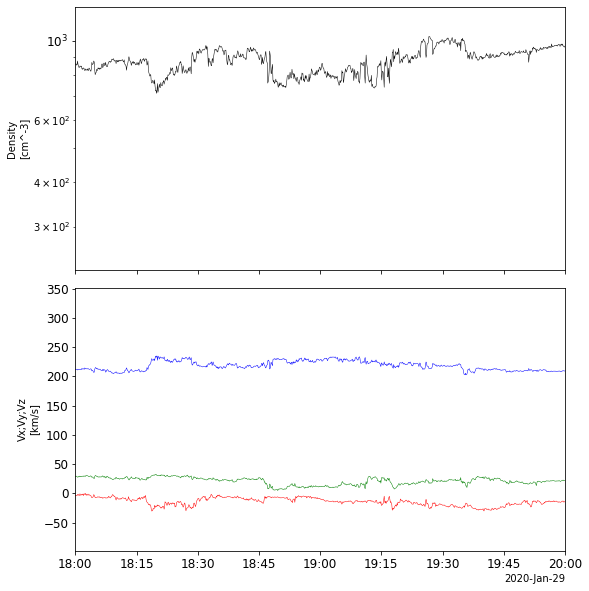

In [37]:
#specify shorter time range in format 'yyyy-mm-dd hh:mm:ss'
trange1=['2020-01-29 18:00:00','2020-01-29 20:00:00']
#set limits 
xlim(trange1[0],trange1[1])
#replot
tplot(['DENS','VEL_RTN_SUN'])

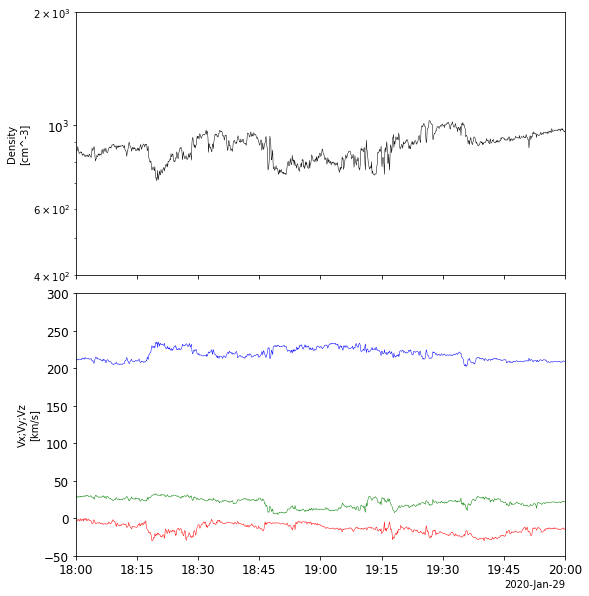

In [43]:
#specify limits on y-axis
ylim('DENS',4E2,2E3)
ylim('VEL_RTN_SUN',-50,300)
tplot(['DENS','VEL_RTN_SUN'])

# Investigation 1
The dates of the fourth orbit around the Sun, also known as encounter 4 (E4) were roughly from 2020-01-23 to 2020-02-04. Plot the distance from the sun, velocity in instrument coordinates, and the magnetic field in instrument coordinates for the whole encounter. What trends do you notice? Are there any similarities or differences between the inbound (coming toward the Sun) vs outbound (moving away from the Sun) of the orbit? Play with different time ranges. Add Density and Temperature. Do you notice any patterns between different variables?

In [62]:
vel_rtn=get_data('VEL_RTN_SUN')
print(vel_rtn[1].shape)
vr=vel_rtn[1][:,0]
print(vr)
print(vr.shape)


(12359, 3)
[279.51828 280.958   283.44418 ... 205.86021 205.86696 205.93285]
(12359,)
